# Lab 2 - Model training with Logistic Regression
<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your second lab! This notebook contains all the code and comments that you will need to submit. Labs are running over two weeks and the places where you need to edit are highlighted in red. Please note that the colour highlighting might not work across all IDEs, so make sure you check and all cells! </br>
Feel free to add in your own markdown for additional comments, and also directly comment your code.

__Submission details:__ 
- __Make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_).__ </br>
- __Submit this Jupyter Notebook (_Lab_2.ipynb_) and also submit the .py file that is generated.__

In [1]:
## This code snippet does not need to be edited

from python_environment_check import check_packages
from python_environment_check import set_background

## Colour schemes for setting background colour
white_bgd = 'rgba(0,0,0,0)'
red_bgd = 'rgba(255,0,0,0.2)'
blue_bgd = 'rgba(0,0,255,0.2)'

[OK] Your Python version is 3.9.13 (main, Aug  2 2022, 11:35:16) 
[GCC 8.3.0]


In [2]:
set_background(red_bgd)
## Code snippets in red (similar to this) is where you need to edit your answer)
## Note: Whether the colour will actually be displayed will depend on your environment (it should work on jupyterlab, but might not on Google Colab),
##       so make sure you check all the cells independent of their colour!

# Set your student ID and name here:
student_number = 31975658  # 12345678
student_name = "Sihan Ren" # "John Doe"

# Preliminaries 
Before we start with the actual lab, let's run a quick version check and see if you're environment is suited / set up as expected.

In [3]:
## Checks for the minimum version requirements for a few libraries
## Credits to: https://sebastianraschka.com/blog/2022/ml-pytorch-book.html for the code related to checking version requirements


d = {
    #'torch': '1.8.0',
    #'torchvision': '0.9.0',
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
}

check_packages(d)

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
else:
  print('Not running on CoLab')

[OK] numpy 1.23.1
[OK] matplotlib 3.5.2
Not running on CoLab


As you've learnt last time, libraries are important as they save us time. We use the `import` function to import libraries, and use _as_ to rename the library within our workspace. For example, we could use _import numpy_ by itself and then reference Numpy functions by _numpy.function_. However, we can also keep things simple and define an alias of Numpy as _np_, followed by referencing the functions as _np.function_. Note that using _np_ is a common naming convention for numpy, and you will likely come across this in many other codes.

In [4]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random ## Useful for sampling 
# import sys ## Useful to retrieve some system information

# from scipy.special import gamma ## Pre-built gamma function that we will use for this lab (for the final task)
# import math # Basic math library

import os ## Useful for running command line within python
from IPython.display import Image ## For markdown purposes

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the hyper parameters that are not does not have __set_background(red_bgd)__ in it

# Logistic Regression - A quick recap

Recall from the lecture that the name **Logistic Regression** is slightly misleading: Instead of regression, we are solving **classification** problems with this appraoch! </br>
More specifically, we model the probabilities of the outcomes of our classification problem, and we can thus understand logistic regression like an extension of linear regression to solve classification (_i.e._, for categorical data). 

A visual comparison of Linear Regression vs. Logistic regression and especially their 'output' predictions $Y$ for different input points $X$ in a simple 1D case is depicted in the following image:

In [5]:
Image(url='https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg', width=800)

Throughout this lab, there will be code and written answers that you need to fill in / complete. The comments in the code snippet and markdown text will guide you on what you need to do. </br>

**Note that you can find examples of the expected outcomes within the lab instructions (.pdf document)**

# Section 1 - The sigmoid function and making predictions

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a logistic regression problem. </br>
In detail, you are going to
- 1.1 Implement and visualise the **sigmoid function**
- 1.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model

## 1.1  The sigmoid function

The '_sigmoid function_' $\sigma$, sometimes also called '_logistic function_', is a mathematical function that shows a characteristic "S"-shaped curve as you've seen during the lecture (hence its name!). We commonly use this function in our logistic regression to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid
In this task, you are now first asked to write a function that computes the output of the sigmoid function $\sigma(\boldsymbol{x})$ for any input value $\boldsymbol{x}$. </br>
_Hint:_ Use the _numpy_ library you have been introduced to in the previous lab to allow easy computation of multi-dimensional input values as well.

In [6]:
set_background(red_bgd)
# Implement the sigmoid function
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

To test the correctness of your implementation, call your sigmoid function with the following input values:
- $x_1 = 2.$ 
- $\boldsymbol{x}_2 = [5., 10.]$
- $\boldsymbol{x}_3 = [ [-5., -7.], [4., 2.] ]$


In [7]:
set_background(red_bgd)

## Define the inputs x1, x2 and x3 (hint: use numpy for arrays):
x_1 = np.array(2.)
x_2 = np.array([5., 10.])
x_3 = np.array([[-5., -7.],
                [4., 2.]])

# Use your implemented sigmoid function to obtain the results for the given x_i
z_1 = sigmoid(x_1)
z_2 = sigmoid(x_2)
z_3 = sigmoid(x_3)



In [8]:
## Now let's print the obtained results

print(f'z_1: {z_1}')
print(f'z_2: {z_2}')
print(f'z_3: {z_3}')

z_1: 0.8807970779778825
z_2: [0.99330715 0.9999546 ]
z_3: [[6.69285092e-03 9.11051194e-04]
 [9.82013790e-01 8.80797078e-01]]


If your implementation is correct, you should obtain a printed output similar to this: </br>
- z_1: &nbsp;&nbsp;0.8807970779778823 </br>
- z_2: [0.99330715 0.9999546 ] </br>
- z_3: [[6.69285092e-03 9.11051194e-04]</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[9.82013790e-01 8.80797078e-01]]</br>

### Visualising the sigmoid

You will now use your experience with numpy and matplotlib from the previous lab to visualise the output range of our implemented sigmoid function for a 1 dimensional case in the range $x \in [-10, 10]$. </br>
In detail, we ask you to:
- Visualise the outputs of the sigmoid as a **line plot in blue colour**.
- Visualise the outputs of the sigmoid as a **scatter plot in red colour**.

Please plot both into the same figure! </br>
Use **50 data points** to get a smooth plot, and make sure to add an appropriate **plot title** and to **label the axes**!</br>
_Hint_: Check the matplotlib docu for details how to do this. You can find many examples there for a variety of different applications. (Check the lab instructions .pdf to see an example of what is expected here.)

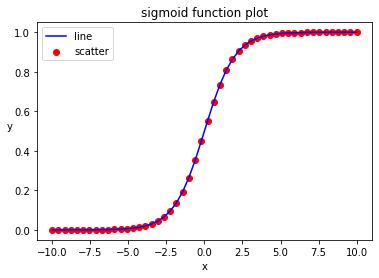

In [9]:
set_background(red_bgd)

## Visualise the output of the sigmoid function in a range from -10 to 10

x = np.linspace(-10, 10, 50)
y = sigmoid(x)
plt.plot(x, y, 'b', label = 'line')
plt.scatter(x, y, c = 'r', label = 'scatter')
plt.xlabel('x')
plt.ylabel('y', rotation = 0)
plt.legend()
plt.title('sigmoid function plot')
plt.show()

In [10]:
set_background(red_bgd)

# What is the difference between the line plot and the scatter plot?

# The line chart shows us a pattern between x and y, which means the data used should be linear.
# Also, there is a clearly relationship in the data. The scatter chart helps us to display datasets,
# it can only reveal a pattern if we have enough data.

# What would happen if you only used a small number of datapoints to plot? 

# It may not show the whole pattern of the data and can be less accurate.

## 1.2 Making predictions
You will now use your implemented sigmoid function to solve an actual classification problem using logistic regression. </br>
As discussed in the lecture, a prediction $\hat{y}$ can be obtained by using our logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

Note that for this example, we want to be able to use many samples at the same time - all of which are stored in one single vector $X$, which is similar to the test case $\boldsymbol{x_3}$ from before.

Also note that we predict the distribution over the classes, _i.e._ the probablity for each class -> to get the 'hard' class label, we will later on assign everything below the probablity of 0.5 to class1 and above to class2 (boundary could be included in either).

In [11]:
set_background(red_bgd)

# Read in the lab2_main_data.npz using numpy --> data has been saved via np.savez (check docu for more details)

# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data we're going to use
# 'y_train' : labels for the training data
# 'X_test'  : test data we're going to use for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of pretrained weights for the logistic regression model

loaded_data = np.load('lab2_main_data.npz')
print(loaded_data.files)

X_train = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
w_pret = loaded_data['w_pret']

['X_train', 'y_train', 'X_test', 'y_test', 'w_pret']


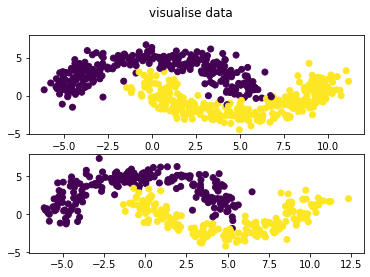

In [12]:
set_background(red_bgd)

# Add side by side plots here to visualise your train and test data (Use subplots). 
# These are the two classes you will be classifying. 
fig, axes = plt.subplots(2, sharey=True)
fig.suptitle('visualise data')
axes[0].scatter(X_train[:, 0], X_train[:, 1], c = y_train)
axes[1].scatter(X_test[:, 0], X_test[:, 1], c = y_test)
plt.show()

In [13]:
## Check the shape of the data!
# Note that we assume certain shapes of data for the basic logistic regression formulas to work, 
# so make sure you understand which elements should be multiplied with each other!
# Hint: In case the data is stored in a different shape, you can easily transpose the matrices!

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print(f'w_pret: {w_pret.shape}')


X_train: (600, 2)
y_train: (600, 1)
X_test: (400, 2)
y_test: (400, 1)
w_pret: (2, 1)


In [14]:
set_background(red_bgd)

## Explain the shapes of the data: 
#  What do the numbers represent, and why do they differ? 

# Take X_train as an example, the first number 600 means there are 600 samples, the second
# number 2 means there are 2 attributes in a sample. Thus, y_train is the result of X_train
# and only contains one attribute which is 1 or 0. X_test and y_test are similar to 
# X_train and y_train, the difference is the number of samples they include. w_pret dataset 
# contains the weights of X inputs, so it has the same row number as X column number.

### Predicting class probabilities via logistic regression
After having obtained the data and a set of pretrained weights for our logistic regression model, you are now going to
- Implement a function to predict outcomes using a linear regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Test your function on the example data provided below
- Test your function on the read-in training data $\boldsymbol{X}_{train}$

In [15]:
set_background(red_bgd)

# # Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):
    # Reshape X input to have data in the columns [mxn]-->[nxm]
    # No need to reshape
    # Perfrom Matrix multiplication
    z = X @ w
    # Calling Sigmoid
    a = np.transpose(sigmoid(z))
    return a.T #output y_hat as an mx1 array

Test your prediction function using the following toy data points / samples:
- $\boldsymbol{X}_1 = [[0.5, 0.1]]$
- $\boldsymbol{X}_2 = [ [-0.5, -0.7], [0.4, 0.2] ]$
- $\boldsymbol{X}_3 = [ [-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64] ]$

Note that our data is stored as [number of samples, dim], so you need to pay attention to possibly required transpose operations to perform the calculations correctly. </br>
We also want the same to be true for our predictions, _i.e._ return them in the format [number of samples, 1] to match the input data.

In [16]:
set_background(red_bgd)
## Define the toy input data
X_1 = [.5, .1] 
X_2 = [[-.5, -.7],
       [.4, .2]]
       
X_3 = [[-.3, -.5],
       [.89, -.02],
       [-.35, .01],
       [.26, -.64]]

## Obtain predictions using predict function and pretrained parameters w_pret
y_hat_1 = predict(X_1, w_pret)
y_hat_2 = predict(X_2, w_pret)
y_hat_3 = predict(X_3, w_pret)

print(f'y_hat_1: {y_hat_1}')
print(f'y_hat_2: {y_hat_2}')
print(f'y_hat_3: {y_hat_3}')

y_hat_1: [0.51370692]
y_hat_2: [[0.61837619]
 [0.48409849]]
y_hat_3: [[0.5893464 ]
 [0.56831845]
 [0.47251372]
 [0.65665833]]


**If your predict function works as intended, your results should be close to:** </br>
y_hat_1: &nbsp;[[0.51370692]]</br>
y_hat_2: [[0.61837619]</br>
&emsp;&emsp;&emsp;&emsp; &nbsp;&nbsp;[0.48409849]]</br>
y_hat_3: [[0.51192789]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.56831845]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.47251372]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.65665833]]</br>

Now let's additionally test the predict function on the $\boldsymbol{X}_{train}$ data we read in from the stored file and compare the output shape to the shape of the provided labels $\boldsymbol{y}_{train}$.

In [17]:
set_background(red_bgd)

## Test on the read-in X_train data:
y_train_hat = predict(X_train, w_pret)

# Compare shapes:
print(y_train_hat.shape)
print(y_train.shape)

# check first predicted element
print(y_train_hat[0])

(600, 1)
(600, 1)
[0.98278992]


If your predict function works correctly, the shapes of the predictions and the provided labels should match. </br>
You can also take a look at the first element of the prediction - it should have a value of around $0.98278992$.

# Section 2 - Training a model via Gradient Descent

In this second task, you will be writing code for the essential components to **train your own logistic model via Gradient Descent** given some training data. </br>
In detail, you are going to
- 2.1 Implement a function that computes and returns **gradient and cost** of the logistic regression
- 2.2 Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train your own logistic regression model** given some training data
- 2.3 **Evaluate your model** on previously unseen test data points


As discussed in more detail during the lecture, we commonly use the so-called _Cross Entropy_ Loss to calculate the cost of our logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z) = 1 / (1 + \exp(-z))$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>
The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as 
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

## 2.1  Gradient and Cost Computation
In this part, we want to define a function that is able to compute our cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of our loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$. </br>
As you can see above, all we need to compute the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

In [18]:
eps = 1e-12
y = np.array([0, 3, 5, 1])
y = np.where(y == 0, eps, y)
print(y)

[1.e-12 3.e+00 5.e+00 1.e+00]


In [19]:
set_background(red_bgd)

def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    #    Set of samples X (each sample is a row in X),
    #    Corresponding ground-truth labels y 
    #    Predicted class probabilities y_hat
    
    # Import smallest number represented to handle log(0) edge case
    eps = 1e-12
    # Compute the mean cross-entropy loss w.r.t. the parameters w (mean as defined in lecture)
    
    loss = -np.mean(y * np.log10(y_hat + eps) + (1 - y) * np.log10(1 - y_hat + eps))
    # log(0) might throw error, so handled via small eps -> Might be irrelevant, to be tested
    
    # Compute the gradient vector (mean over all samples as defined in lecture)
    grad_vec = X.T @ (y_hat - y) / X.shape[0]
    
    # Return loss and gradient vector
    return loss, grad_vec

In [20]:
np.random.seed(12345)
w = np.random.randn(X_train.shape[1], 1) 

preds = predict(X_train, w)

_, grad_vec = compute_loss_and_grad(X_train, y_train, preds)

## 2.2 Training with Gradient Descent

Gradient descent, sometimes also referred to as _steepest descent_, is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. As you have heard in the lecture, the idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point - i.e. in the direction of its steepest descent.

In this section of the lab, you are going to implement the **Gradient Descent algorithm** as a function that we can use afterwards to train our logistic regression model!

The main parts of the algorithm work as follows:
- Initialise hyperparameters like step-size aka learning rate, and number of iterations
- Randomly initialise the set of parameters $\boldsymbol{w}_{init}$ that shall be optimised
- For a certain number of iterations, do: 
    - Obtain the prediction using the current weights $\boldsymbol{w}_i$ and training data $\boldsymbol{X}_{train}$
    - Compute the loss $\mathcal{L}_{\mathrm{CE}}$ and the gradient vector $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ w.r.t. the current parameters $\boldsymbol{w}_i$
    - Update the parameters using the gradient vector and learning rate _lr_
- After all iterations are finished, return the final optimised set of parameters

In addition, we ask you to also:
- Return a list of all losses (one value for each iteration)
- Return a list of all gradient vectors (one vector for each iteration)
- Implement an option via the argument "logging" to switch on printing a string containing the 'iteration' and the 'loss' for each iteration

Note that the initial set of parameters $\boldsymbol{w}_{init}$, the hyperparameters as well as the training data $\boldsymbol{X}_{train}$ and labels $\boldsymbol{y}_{train}$ are passed as input arguments to your function.

In [21]:
## Setting some hyperparameters: 
lr = 0.5         # Learning rate
num_epochs = 25    # Number of iterations

In [22]:
set_background(red_bgd)

def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    ## Create empty lists to store the values for loss and gradient vector over all 
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []
    
    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds = predict(X_train, w) 
        # Compute loss and gradient vector for current prediction
        loss, grad_vec = compute_loss_and_grad(X_train, y_train, preds) 
        
        # update the weight parameter according to the GD here
        w -= lr * grad_vec 
        
        losses.append(loss)
        grad_vecs.append(grad_vec)
        
        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

In [23]:
## Run the function on the training set

## Start from a random initialisation
np.random.seed(12345)
w_init = np.random.randn(X_train.shape[1],1) 

# Obtain the final weights via gradient descent
w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=True)

Ep  1 | Loss: 0.755
Ep  2 | Loss: 0.318
Ep  3 | Loss: 0.178
Ep  4 | Loss: 0.130
Ep  5 | Loss: 0.125
Ep  6 | Loss: 0.124
Ep  7 | Loss: 0.124
Ep  8 | Loss: 0.124
Ep  9 | Loss: 0.124
Ep 10 | Loss: 0.124
Ep 11 | Loss: 0.124
Ep 12 | Loss: 0.124
Ep 13 | Loss: 0.123
Ep 14 | Loss: 0.123
Ep 15 | Loss: 0.123
Ep 16 | Loss: 0.123
Ep 17 | Loss: 0.123
Ep 18 | Loss: 0.123
Ep 19 | Loss: 0.123
Ep 20 | Loss: 0.123
Ep 21 | Loss: 0.123
Ep 22 | Loss: 0.123
Ep 23 | Loss: 0.123
Ep 24 | Loss: 0.123
Ep 25 | Loss: 0.123


## 2.3 Evaluating the trained model

After you have obtained your optimised set of parameters $\boldsymbol{w}^{*}$, let's see how your model performs! </br>

To this end, you are going to:
- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report your obtained accuracies for both training and test data

In [24]:
set_background(red_bgd)

## Evaluate the obtained model on training data and previously unseen test data

# Obtain predicted class probabilities for train and test data
y_hat_train = predict(X_train, w_final) 
y_hat_test  = predict(X_test, w_final)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_hat_train = np.where(y_hat_train < 0.5, 0, 1) 
c_hat_test = np.where(y_hat_test < 0.5, 0, 1) 

# Evaluate the classification accuracy for training and test data
acc_train = 1 - np.sum(np.abs(y_train - c_hat_train)) / len(y_train)
acc_test = 1 - np.sum(np.abs(y_test - c_hat_test)) / len(y_test) 

# Print outputs
print(f'Training accuracy: {acc_train:.3f} | Test accuracy: {acc_test:.3f}')

Training accuracy: 0.870 | Test accuracy: 0.853


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around: 

Training accuracy: 0.868 | Test accuracy: 0.853

# Section 3 - Analysing convergence and accuracy

## 3.1 Improving the accuracy
Our previous choice of hyperparameters might not be the best possible one (or even close to it). </br>
Can you achieve a **better test accuracy** by changing the hyperparameters from the previous task? </br>
Try to improve upon the standard choice by varying the learning rate `lr` and number of training iterations `num_epochs`. Report your choice and best results below!

**Potentially also let them analyse training vs test accuracy? Would it overfit on this data?**

In [25]:
set_background(red_bgd)

## Report your best results as well as hyperparameter choices!
# From above experiment, I found when lr is 0.5 and num_epochs is 25, the result has best accuracy. 
# For training data and test data, accuracies are 0.870 and 0.853 respectively.

# Could basically be anything that gets better results, some good combination of learning rate 
# and probably slightly higher number of epochs


## 3.2 Training convergence

In this section, you are now going to take a closer look at how gradient descent 'progresses' for different choices of hyperparameters.

Given the provided set of learning rates _lrs_, run your implemented gradient descent method and plot the obtained loss values over the number of iterations for each learning rate.  </br>
Additionally save the training and test accuracies achieved for each learning rate. </br>
You can re-use/copy-and-paste your code from above, or define it as a function!

In [26]:
## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 1.0, 2.5, 5., 10., 75.]
# Max number of iterations for GD algorithm to run
num_epochs = 20 

/tmp/ipykernel_2106/677499717.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


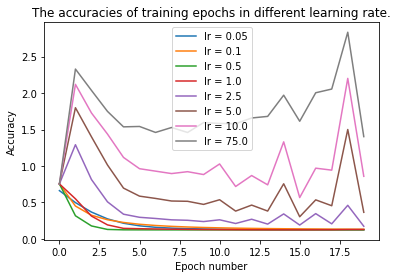

In [27]:
set_background(red_bgd)

## Run gradient descent for all learning rates, and plot results
fig, ax = plt.subplots()
x_vals = range(num_epochs)
leg = []  # legend entries
w_finals = {}
for lr in lrs:
    ## Start from a random initialisation
    w_init = np.random.randn(X_train.shape[1],1) 
    ## Start from a random initialisation
    np.random.seed(12345)

    # Obtain the final weights via gradient descent
    w_final, losses, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, )
    ax.plot(x_vals, losses)
    leg.append(f'lr = {lr}')
    w_finals[f'lr={lr}'] = w_final

# Add legend, title and label the axes
plt.title('The accuracies of training epochs in different learning rate.')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(leg)
plt.show()

In [28]:
set_background(red_bgd)

## Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
    y_hat = predict(X, w)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat = np.where(y_hat < 0.5, 0, 1)

    # Evaluate the classification accuracy
    acc = 1 - np.mean(np.abs(c_hat - y))
    
    return acc

print(' >>> Training accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_train, y_train, v), 3)}')
    
print('\n >>> Test accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_test, y_test, v), 3)}')

 >>> Training accuracies for different learning rates: <<<
lr=0.05: 	 0.868
lr=0.1: 	 0.863
lr=0.5: 	 0.868
lr=1.0: 	 0.855
lr=2.5: 	 0.838
lr=5.0: 	 0.822
lr=10.0: 	 0.833
lr=75.0: 	 0.827

 >>> Test accuracies for different learning rates: <<<
lr=0.05: 	 0.852
lr=0.1: 	 0.84
lr=0.5: 	 0.852
lr=1.0: 	 0.83
lr=2.5: 	 0.815
lr=5.0: 	 0.798
lr=10.0: 	 0.812
lr=75.0: 	 0.8


## 3.3 Describe & Explain

Answer the following questions and elaborate on your observations:

In [29]:
set_background(red_bgd)

## Answer the following questions:

# What do you observe? Are there general trends in convergence visible, and are they ‘good’ or ‘bad’? 
# I observe accuracies decrease first(lr grow from 0.05 to 0.1), and increase later(lr grow from 0.1 to 0.5).
# Then accuracies keeps on decreasing until the lr is 75.0, and grows until the end of lr. 

# What do you think would be the best choice out of the set of provided learning rates, and why? 
# I think lr is 0.5 is the best choice, because it is the peak point(if we draw a line) of all learning rates.

# Can you find an even better one?
# Yes, I can. The better one  value should be between 0.1 to 1.0 and around 0.5.

# How is the accuracy on the training and test data related to these convergence results?
# learning rates in training data are more accurate than test data.

# Section 4 - Using non-linear features for better classification

In this section, you will be writing code to **train your own logistic model via Gradient Descent** given some training data with non-linear features. </br>
In detail, you are going to
- 4.1 Visualize dataset and create non-linear train and test datasets.
- - Scenario 1: $\mathbb{R}^2 \ni x = (x_1,x_2)^\top$ 
- - Scenario 2: $\mathbb{R}^i \ni x = ? $, suggest the mapping and value for **i** considering data distribution.
- 4.2 Using above functions (predict, compute_loss_and_grad), **train your own logistic regression model** given some training data on scenario 1. **Evaluate your model** on previously unseen test data points.
- 4.3 **Plot the decision boundary** for scenario 1 on test data.
- 4.4 Using above functions (predict, compute_loss_and_grad), **train your own logistic regression model** given some training data on scenario 2. **Evaluate your model** on previously unseen test data points.
- 4.5 **Plot the decision boundary** for scenario 2 on test data.
- 4.6 Evaluate model's performance adapting **Decaying learning rate** during training for scenario 2. Report your findings.

## 4.1 Load data and create train and test dataset

You are going to start the task 4 by loading numpy data and creating train and test datasets. To get an idea about the data distribution, visualize train and test data using matplotlib. Then map $\mathbb{R}^2$ to $\mathbb{R}^i$ and create anothor train dataset.

In [30]:
set_background(red_bgd)

# Load numpy dataset from Lab2_task4_data.npz
loaded_data_task4 = np.load('Lab2_task4_data.npz')

# Create train and test datasets 
# (X_train_circle--> arr_0, X_test_circle--> arr1_, Y_train_circle--> arr_2, Y_test_circle--> arr_3)
X_train_circle = loaded_data_task4['arr_0']
X_test_circle = loaded_data_task4['arr_1']
y_train_circle = loaded_data_task4['arr_2']
y_test_circle = loaded_data_task4['arr_3']

In [31]:
print(f'X_train_circle: {X_train_circle.shape}')
print(f'y_train_circle: {y_train_circle.shape}')
print(f'X_test_circle: {X_test_circle.shape}')
print(f'y_test_circle: {y_test.shape}')

X_train_circle: (600, 2)
y_train_circle: (600, 1)
X_test_circle: (400, 2)
y_test_circle: (400, 1)


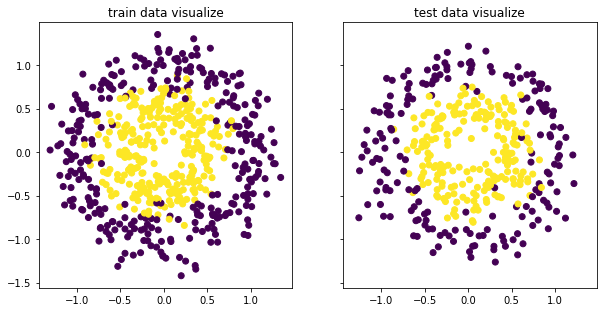

In [32]:
set_background(red_bgd)

# Visualize non-linear features for both train and test data 
# Create two plots side-by-side (Use subplots)

fig, axes = plt.subplots(1, 2, sharex =True, sharey = True, figsize = (10, 10))

axes[0].scatter(X_train_circle[:, 0], X_train_circle[:, 1], c = y_train_circle)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_title('train data visualize')
axes[1].scatter(X_test_circle[:, 0], X_test_circle[:, 1], c = y_test_circle)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_title('test data visualize')

plt.show()

Considering the data distribution what type of mapping do you suggest ?

In [33]:
set_background(red_bgd)

# Answer for the above question
# Nonlinear mapping method, which means increase R^2 to R^i.

In [34]:
set_background(red_bgd)

# Mapping R^2 to R^5

test_squ = np.square(X_test_circle)
train_squ = np.square(X_train_circle)

test_b = np.ones((X_test_circle.shape[0],1))
train_b = np.ones((X_train_circle.shape[0],1))

X_test_circle_hat = np.concatenate((test_b, X_test_circle, test_squ), axis = 1)
X_train_circle_hat = np.concatenate((train_b, X_train_circle, train_squ), axis = 1)


## 4.2 Train the model using GD for scenario 1 data

Now that everything is ready, lets first train the model using scenario 1 data and evaluate model's test accuracy.

Use predict and compute_loss_and_grad functions during training loop.

In [35]:
set_background(red_bgd)

lr=1.0
num_epochs = 30

loss = np.zeros(num_epochs)
theta = np.random.randn(X_train_circle.shape[1],1)
    
for ep in range(num_epochs):
    # call predict function
    y_train_hat = predict(X_train_circle, theta)
    
    # call the compute_loss_and_grad that you have implemented above to 
    # measure the loss and the gradient
    loss[ep], grad_vec = compute_loss_and_grad(X_train_circle, y_train_circle, y_train_hat)

    # update the theta parameter according to the GD here
    theta -= grad_vec  

# Obtain predicted class probabilities for train and test datasets
y_test_hat = predict(X_test_circle, theta) 
y_train_hat = predict(X_train_circle, theta)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_test_hat = np.where(y_test_hat < 0.5, 0, 1) 
c_train_hat = np.where(y_train_hat < 0.5, 0, 1)

# Evaluate the classification accuracy for training and test data
test_score = 1 - np.mean(np.abs(c_test_hat - y_test_circle)) 
train_score = 1 - np.mean(np.abs(c_train_hat - y_train_circle))

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy: {:.3f}".format(test_score))

Training accuracy: 0.518
Test accuracy: 0.488


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around: 

Training accuracy: 0.518 | Test accuracy: 0.487

## 4.3 Decision Boundary for model trained with scenario 1 data

Plot the decision boundary for the model trained on scenario 1 data.

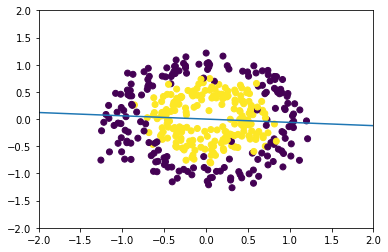

In [36]:
set_background(red_bgd)

x_boundary_circle=np.linspace(-5,5,1000)
# Predict decision boundary
y_boundary_circle= theta[0] * x_boundary_circle + x_boundary_circle * theta[1]

# Visualize ground truth data of testing dataset and the predicted decision boundary

fig_circle=plt.figure()

plt.scatter(X_test_circle[:, 0], X_test_circle[:, 1], c = y_test_circle)
plt.plot(x_boundary_circle, y_boundary_circle)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.show()

## 4.4 Train the model using GD for scenario 2 data

Now, train the model using scenario 2 data and evaluate model's test accuracy.

Again, use predict and compute_loss_and_grad functions during training loop.

In [37]:
set_background(red_bgd)

lr=1.0
num_epochs = 30

loss = np.zeros(num_epochs)
theta = np.random.randn(X_train_circle_hat.shape[1], 1)
    
for ep in range(num_epochs):
    # call predict function
    y_train_hat = predict(X_train_circle_hat, theta) 
    
    # call the compute_loss_and_grad that you have implemented above to 
    # measure the loss and the gradient
    loss[ep], grad_vec = compute_loss_and_grad(X_train_circle_hat, y_train_circle, y_train_hat)

    #update the theta parameter according to the GD here
    theta -= lr * grad_vec   

# Obtain predicted class probabilities for train and test datasets
y_test_hat = predict(X_test_circle_hat, theta) 
y_train_hat = predict(X_train_circle_hat, theta)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_test_hat = np.where(y_test_hat < 0.5, 0, 1) 
c_train_hat = np.where(y_train_hat < 0.5, 0, 1)

# Evaluate the classification accuracy for training and test data
test_score = 1 - np.mean(np.abs(c_test_hat - y_test_circle)) 
train_score = 1 - np.mean(np.abs(c_train_hat - y_train_circle))

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy: {:.3f}".format(test_score))

Training accuracy: 0.917
Test accuracy: 0.895


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around: 

Training accuracy: 0.912 | Test accuracy: 0.902

## 4.5 Decision Boundary for model trained with scenario 2 data

Plot the decision boundary for the model trained on scenario 2 data.

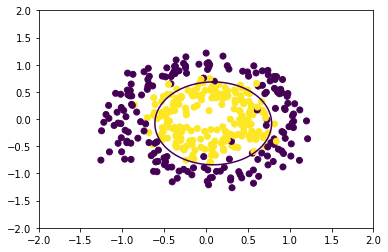

In [38]:
set_background(red_bgd)

xx=np.linspace(-2,2, 1000)
yy=np.linspace(-2,2, 1000)
[X2,Y2]=np.meshgrid(xx,yy)

# Reshape data according to the scenario 2 mapping and predict decision boundary
y_boundary_circle = theta[0] + theta[1]*Y2 + theta[2]*X2 + theta[3]*(Y2**2) + theta[4]*(X2**2)
# Visualize ground truth data of testing dataset and the predicted decision boundary
fig=plt.figure()

plt.scatter(X_test_circle[:, 0], X_test_circle[:, 1], c = y_test_circle)
plt.contour(X2, Y2, y_boundary_circle, [0])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


## 4.6 Evaluate models performance with Decaying Learning rate 

Let's try to improve accuracy of the model trained on scenario 2 data using decaying learning rate during model training.

In the previous tasks, you used a fixed learning rate during training. Can we improve model's accuracy by having a dynamic learning rate? Lets find out!

Resources: https://www.mygreatlearning.com/blog/understanding-learning-rate-in-machine-learning/

In [39]:
set_background(red_bgd)

# Write a simple function to decrease current learning rate by 1% in each epoch
def decaying_lr(lr):
    new_lr = lr * 0.99 
    
    return new_lr

In [40]:
set_background(red_bgd)

lr=1.0
num_epochs = 30

loss = np.zeros(num_epochs)
theta = np.random.randn(X_train_circle_hat.shape[1],1)
    
for ep in range(num_epochs):
    # call predict function
    y_train_hat = predict(X_train_circle_hat, theta) 
    
    # call the compute_loss_and_grad that you have implemented above to 
    # measure the loss and the gradient
    loss[ep], grad_vec = compute_loss_and_grad(X_train_circle_hat, y_train_circle, y_train_hat) 

    # update the theta parameter according to the GD here
    theta -= grad_vec 
    
    # call decaying_lr function
    lr = decaying_lr(lr)
    
# Obtain predicted class probabilities for train and test datasets
y_test_hat = predict(X_test_circle_hat, theta) 
y_train_hat = predict(X_train_circle_hat, theta)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_test_hat = np.where(y_test_hat < 0.5, 0, 1) 
c_train_hat = np.where(y_train_hat < 0.5, 0, 1)

# Evaluate the classification accuracy for training and test data
test_score = 1 - np.mean(np.abs(c_test_hat - y_test_circle)) 
train_score = 1 - np.mean(np.abs(c_train_hat - y_train_circle))

print("Training accuracy: {:.3f}".format(train_score))
print("Test accuracy: {:.3f}".format(test_score))

Training accuracy: 0.933
Test accuracy: 0.930


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around: 

Training accuracy: 0.930 | Test accuracy: 0.920

# Do not remove or edit the following code snippet. 

When submitting your report, please ensure that you have run the entire notebook from top to bottom. You can do this by clicking "Kernel" and "Restart Kernel and Run All Cells". Make sure the last cell (below) has also been run. 

In [41]:
file_name = str(student_number) + '_Lab2_Submission'
cmd = "jupyter nbconvert --to script Lab2_Student.ipynb --output " + file_name
if(os.system(cmd)):
    print("Error converting to .py")
    print("cmd")

[NbConvertApp] Converting notebook Lab2_Student.ipynb to script
[NbConvertApp] Writing 40620 bytes to 31975658_Lab2_Submission.py


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=045f10cd-4029-4eb0-ae61-310d684b5c1a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>